
# Analyse previsionnelle de cryptocurrencies

Importation des données :

Analysons le cours des 5 meilleurs cryptomonnaies sur les X annees

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfEth=pd.read_csv('/content/eth-usd-max.csv')
dfEth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    2842 non-null   object 
 1   price         2842 non-null   float64
 2   market_cap    2841 non-null   float64
 3   total_volume  2842 non-null   float64
dtypes: float64(3), object(1)
memory usage: 88.9+ KB


In [ ]:
dfEth.tail()

,snapped_at,price,market_cap,total_volume
2837,2023-05-15 00:00:00 UTC,1799.008659,2.164395e+11,4.914907e+09
2838,2023-05-16 00:00:00 UTC,1820.044760,2.185137e+11,7.655256e+09
2839,2023-05-17 00:00:00 UTC,1823.663018,2.195621e+11,6.283429e+09
2840,2023-05-18 00:00:00 UTC,1821.050635,2.191243e+11,6.647945e+09
2841,2023-05-19 00:00:00 UTC,1802.390955,2.170788e+11,6.170213e+09


In [ ]:
dfBtc=pd.read_csv('/content/btc-usd-max.csv')
dfBnb=pd.read_csv('/content/bnb-usd-max.csv')

Exploration des donnees

In [ ]:
dfBnb

,snapped_at,price,market_cap,total_volume
0,2017-09-16 00:00:00 UTC,0.107251,1.072506e+07,1.051223e+00
1,2017-09-17 00:00:00 UTC,0.154041,1.540413e+07,1.467859e+01
2,2017-09-18 00:00:00 UTC,0.173491,1.734912e+07,6.001767e+00
3,2017-09-19 00:00:00 UTC,0.168334,1.683342e+07,3.878927e+00
4,2017-09-20 00:00:00 UTC,0.166628,1.666279e+07,4.068762e+01
...,...,...,...,...
2065,2023-05-15 00:00:00 UTC,311.902344,4.922638e+10,4.269176e+08
2066,2023-05-16 00:00:00 UTC,313.937586,4.955843e+10,4.348720e+08
2067,2023-05-17 00:00:00 UTC,311.459251,4.919840e+10,3.908056e+08
2068,2023-05-18 00:00:00 UTC,313.951610,4.956440e+10,4.315984e+08


In [ ]:
dfBnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    2070 non-null   object 
 1   price         2070 non-null   float64
 2   market_cap    2070 non-null   float64
 3   total_volume  2070 non-null   float64
dtypes: float64(3), object(1)
memory usage: 64.8+ KB


In [ ]:
dfBnb.isnull().sum()

snapped_at      0
price           0
market_cap      0
total_volume    0
dtype: int64

In [ ]:
#statistique descriptive
dfBnb.describe()

,price,market_cap,total_volume
count,2070.000000,2.070000e+03,2.070000e+03
mean,154.042879,2.461599e+10,9.094519e+08
std,180.890432,2.948515e+10,1.558493e+09
min,0.039818,3.981770e+06,7.178009e-01
25%,14.093519,1.746688e+09,1.160614e+08
50%,27.726915,4.162171e+09,3.449141e+08
75%,305.337873,4.856822e+10,1.129772e+09
max,675.098974,1.104412e+11,2.210352e+10


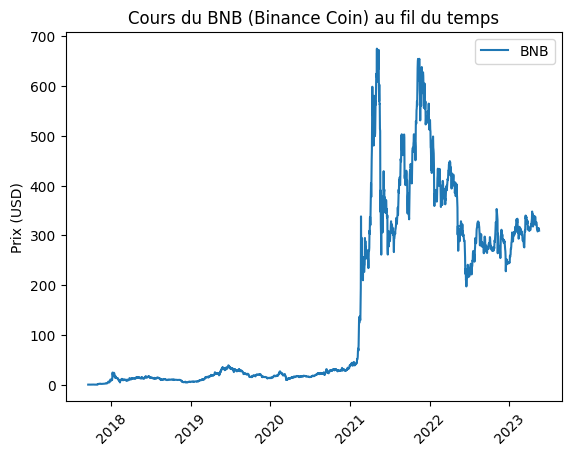

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()
dfBnb['snapped_at'] = pd.to_datetime(dfBnb['snapped_at'])


ax.plot(dfBnb['snapped_at'], dfBnb['price'], label='BNB')

# Ajoutez une légende
ax.legend()

# Ajoutez un titre et des labels d'axes
ax.set_title("Cours du BNB (Binance Coin) au fil du temps")
ax.set_ylabel("Prix (USD)")

# Formate les étiquettes de l'axe des dates pour afficher uniquement les dates annuelles
date_format = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité

plt.show()


Convertissons le format de la Date

In [ ]:
df1=pd.read_csv('/content/bnb-usd-max.csv')

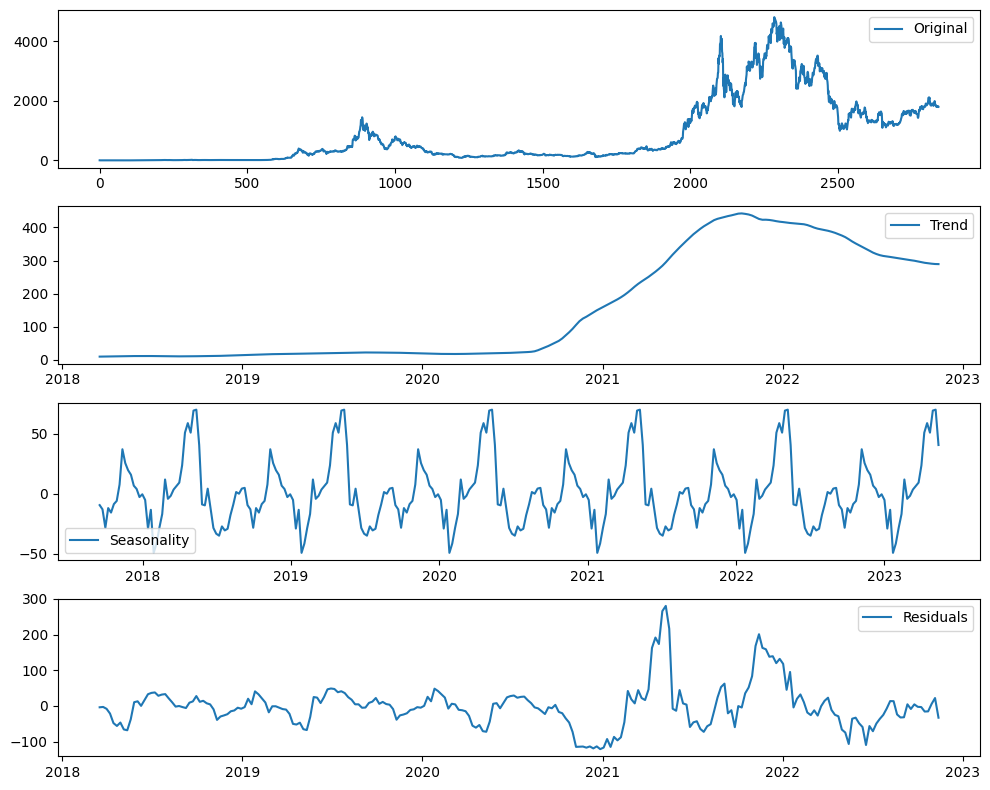

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
#df1['snapped_at'] = pd.to_datetime(df1['snapped_at'])
#df1 = df1.set_index('snapped_at')

df1 = df1.asfreq('W')
# Décomposition de la série en trois composantes : tendance, saisonnalité, bruit
decomposition = sm.tsa.seasonal_decompose(df1['price'], model='additive')

# Affichage de la tendance, de la saisonnalité et du bruit
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,8))
plt.subplot(411)
plt.plot(dfEth['price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Modele ARIMA

In [ ]:
df1.head()

,price,market_cap,total_volume
snapped_at,,,
2017-09-17 00:00:00+00:00,0.154041,1.540413e+07,14.678587
2017-09-24 00:00:00+00:00,0.085455,8.545454e+06,0.769099
2017-10-01 00:00:00+00:00,0.101168,1.011682e+07,123.591078
2017-10-08 00:00:00+00:00,0.129939,1.299389e+07,0.720928
2017-10-15 00:00:00+00:00,0.109732,1.097322e+07,1.865448


In [ ]:
import statsmodels.api as sm

# Décomposition de la série en trois composantes : tendance, saisonnalité, bruit
decomposition = sm.tsa.seasonal_decompose(df1['price'], model='additive')

# Récupération de la tendance, de la saisonnalité et du bruit
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.3 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2292.941, Time=1.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2297.475, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2297.525, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2297.325, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2296.144, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2299.158, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2300.770, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2299.164, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2301.626, Time=0.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2302.453, Time=0.79 s

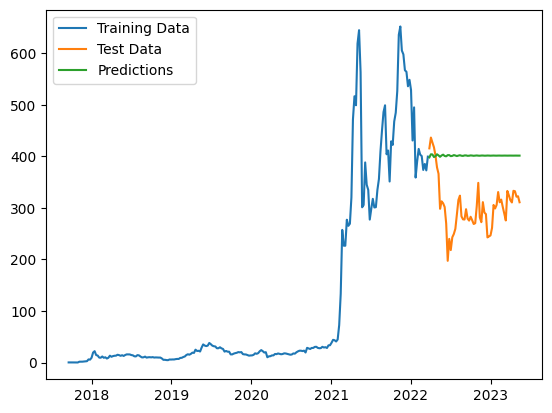

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

# Split the data into train and test sets
train_size = int(0.8 * df1.shape[0])  # 80% des données pour l'entraînement
train_set = df1.iloc[:train_size]
y_train = train_set['price']
test_set = df1.iloc[train_size:]

# Find the optimal ARIMA parameters using auto_arima
model = auto_arima(y_train, seasonal=True, trace=True)

# Fit the model to the data
model.fit(y_train)

# Make predictions on the test set
predictions = model.predict(n_periods=len(test_set))

# Plot the actual values and predicted values
plt.plot(y_train, label='Training Data')
plt.plot(test_set.index, test_set['price'], label='Test Data')
plt.plot(test_set.index, predictions, label='Predictions')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

#df1.index.name = 'ds'
df1 = df1.rename(columns={'price': 'y'})
#il est plus pratique de reset l'index pour l'utiliser comme une colonne
df1 = df1.reset_index()
#Ainsi on peut renommer la colonne timestamp en ds
df1 = df1.rename(columns={'snapped_at': 'ds'})
df1.head()
#len(df_btc.index)

,index,ds,y,market_cap,total_volume
0,0,2017-09-17 00:00:00+00:00,0.154041,1.540413e+07,14.678587
1,1,2017-09-24 00:00:00+00:00,0.085455,8.545454e+06,0.769099
2,2,2017-10-01 00:00:00+00:00,0.101168,1.011682e+07,123.591078
3,3,2017-10-08 00:00:00+00:00,0.129939,1.299389e+07,0.720928
4,4,2017-10-15 00:00:00+00:00,0.109732,1.097322e+07,1.865448


# Facebook Prophet

In [ ]:
from prophet import Prophet
# Create a Prophet model
df_prophet = df1.copy()
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

m = Prophet()
m.fit(df_prophet)
# Make future predictions
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5ejzxcq/8_m4nucr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5ejzxcq/5g2tydn3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7586', 'data', 'file=/tmp/tmpj5ejzxcq/8_m4nucr.json', 'init=/tmp/tmpj5ejzxcq/5g2tydn3.json', 'output', 'file=/tmp/tmpj5ejzxcq/prophet_modeluf7jn5rj/prophet_model-20230520152055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
656,2024-05-09,240.952320,137.629687,344.495746
657,2024-05-10,237.754395,136.160722,327.623022
658,2024-05-11,234.321506,131.816100,328.666087
659,2024-05-12,230.689002,131.634118,325.679737
660,2024-05-13,226.895489,134.233458,319.465881


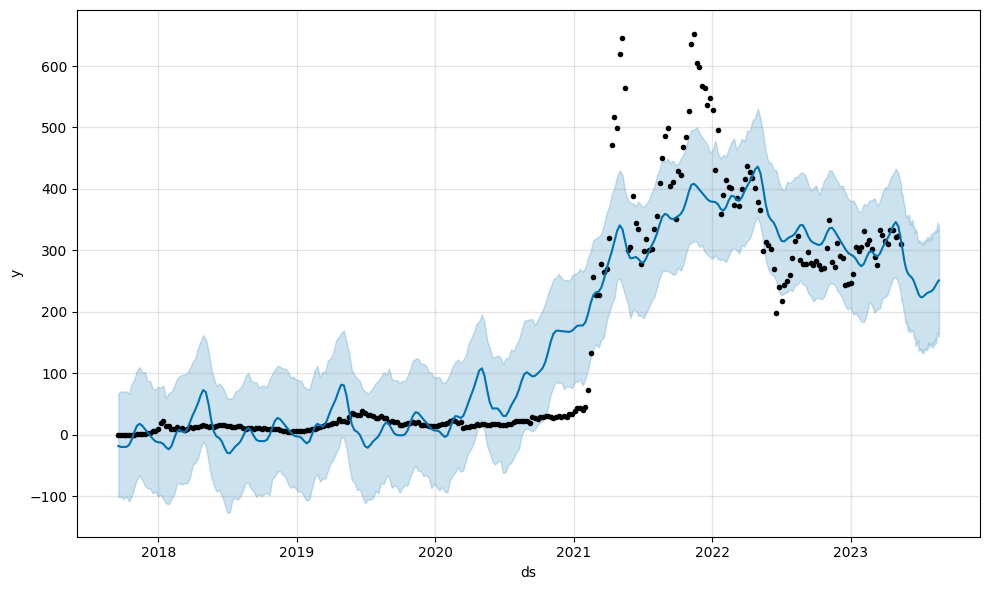

In [ ]:
# Tracé des données observées et des prédictions
m.plot(forecast)

# Affichage du graphique
plt.show()


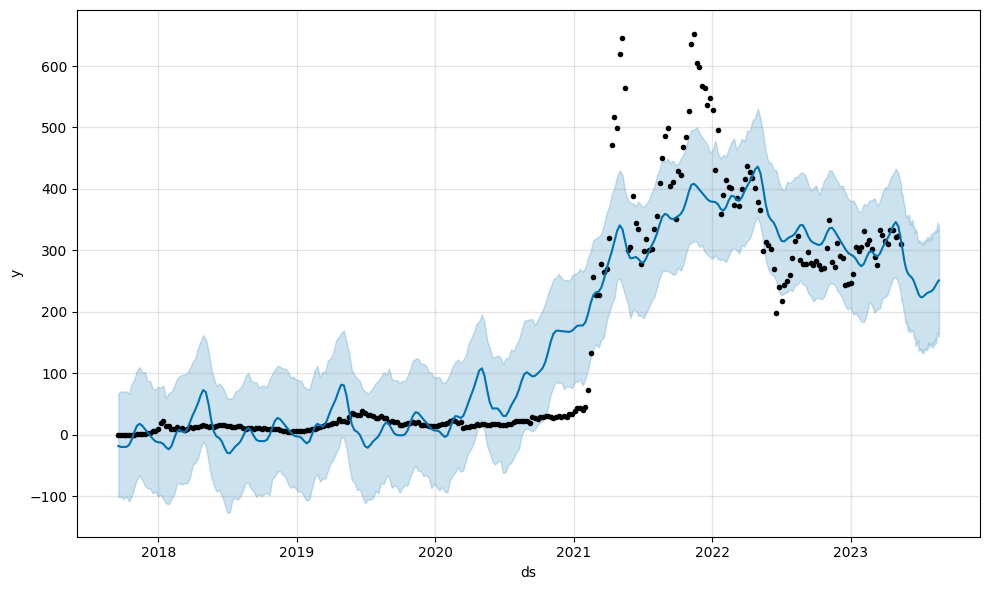

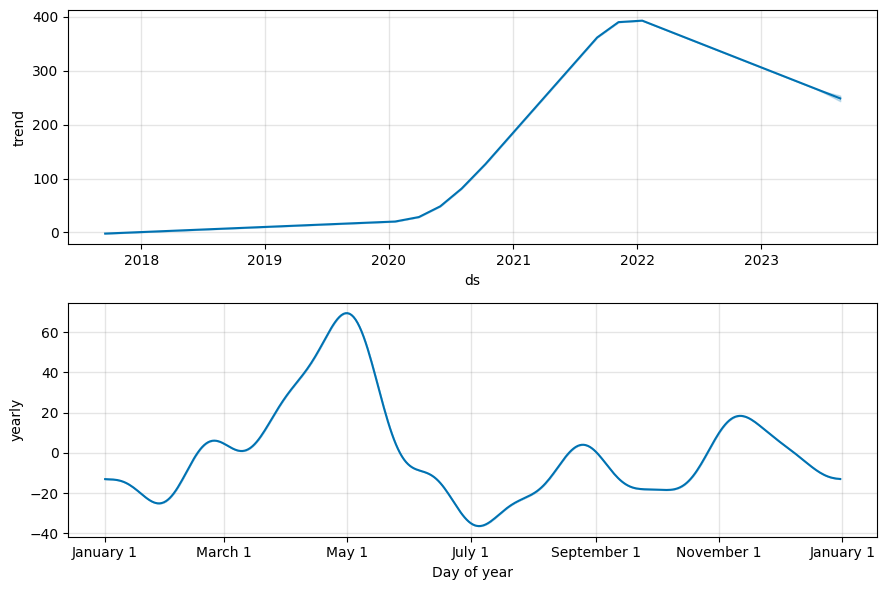

In [ ]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

Optimisation du Modele Prophet

In [ ]:
  # Create a Prophet model
df_prophet = df1.copy()
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

m = Prophet(seasonality_mode='additive',
            yearly_seasonality=True,
            changepoint_prior_scale=0.05,
            seasonality_prior_scale=10.0)

# Ajouter des composantes de tendance supplémentaires
m.add_regressor('market_cap', prior_scale=0.5, standardize=False)

# Ajuster le modèle aux données
m.fit(df_prophet)

# Make future predictions
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5ejzxcq/i4cynb8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5ejzxcq/dp9cbybz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22678', 'data', 'file=/tmp/tmpj5ejzxcq/i4cynb8k.json', 'init=/tmp/tmpj5ejzxcq/dp9cbybz.json', 'output', 'file=/tmp/tmpj5ejzxcq/prophet_modelffvloe3l/prophet_model-20230520160140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:01:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:01:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:01:40 - cmdstanpy - ERROR - Chain [1]

ValueError: ignored